In [273]:
from __future__ import absolute_import, division, print_function

import pathlib

import pandas as pd
import seaborn as sns

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing
import numpy as np
print(tf.__version__)

2.4.1


In [274]:
train_dataset_path = "../input/titanic/train.csv"
test_dataset_path = "../input/titanic/test.csv"
predictions_file = "../input/titanic/gender_submission.csv"

In [275]:
train_raw_dataset = pd.read_csv(train_dataset_path)
train_dataset=train_raw_dataset.copy()
train_dataset  

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [276]:
test_raw_dataset = pd.read_csv(test_dataset_path)
test_dataset = test_raw_dataset.copy()
test_dataset   

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [277]:
train_dataset.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [278]:
train_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [279]:
train_dataset.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [280]:
def bar_charts(col):
    survived = train_dataset[train_dataset['Survived']==1][col].value_counts()
    dead = train_dataset[train_dataset['Survived']==0][col].value_counts()
    df = pd.DataFrame([survived,dead])
    df.index = ['Survived','Dead']
    df.plot(kind='bar', figsize=(10,6),color=["orange","crimson","royalblue"])
    print("survived",train_dataset[train_dataset ["Survived"]==1][col].value_counts(),sep='\n'),
    print("dead",train_dataset[train_dataset["Survived"]==0][col].value_counts(),sep='\n')

survived
S    217
C     93
Q     30
Name: Embarked, dtype: int64
dead
S    427
C     75
Q     47
Name: Embarked, dtype: int64


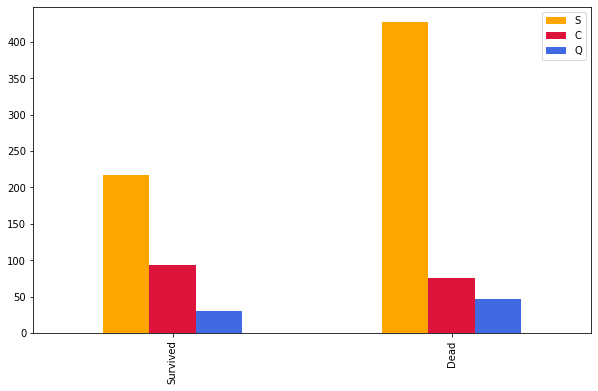

In [281]:
bar_charts("Embarked")

# Feature Engineering

In [282]:
train_dataset["Sex"].replace(to_replace = ["male"], value = 0, inplace = True)
train_dataset["Sex"].replace(to_replace = ["female"], value = 1, inplace = True)
train_dataset["Sex"].replace(to_replace = ["male"], value = 0, inplace = True)
train_dataset["Sex"].replace(to_replace = ["female"], value = 1, inplace = True)

In [283]:
test_dataset["Sex"].replace(to_replace = ["male"], value = 0, inplace = True)
test_dataset["Sex"].replace(to_replace = ["female"], value = 1, inplace = True)
test_dataset["Sex"].replace(to_replace = ["male"], value = 0, inplace = True)
test_dataset["Sex"].replace(to_replace = ["female"], value = 1, inplace = True)

In [284]:
train_dataset['Embarked'].fillna(train_dataset['Embarked'].mode()[0],inplace=True)
train_dataset["Embarked"].isnull().sum()
embark={"S":0, "C":1, "Q":2}
train_dataset["Embarked"].replace(embark,inplace=True)

In [285]:
test_dataset['Embarked'].fillna(test_dataset['Embarked'].mode()[0],inplace=True)
test_dataset["Embarked"].isnull().sum()
embark={"S":0, "C":1, "Q":2}
test_dataset["Embarked"].replace(embark,inplace=True)

In [286]:
train_dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,0


In [287]:
test_dataset.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",0,34.5,0,0,330911,7.8292,NaN,2
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,363272,7.0000,NaN,0
2,894,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,240276,9.6875,NaN,2
3,895,3,"Wirz, Mr. Albert",0,27.0,0,0,315154,8.6625,NaN,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,3101298,12.2875,NaN,0


In [288]:
sibling = train_dataset.pop("SibSp")
Parch = train_dataset.pop("Parch")
train_dataset["Members"] = sibling + Parch

In [289]:
sibling = test_dataset.pop("SibSp")
Parch = test_dataset.pop("Parch")
test_dataset["Members"] = sibling + Parch

In [290]:
train_dataset.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,Members
886,887,0,2,"Montvila, Rev. Juozas",0,27.0,211536,13.00,NaN,0,0
887,888,1,1,"Graham, Miss. Margaret Edith",1,19.0,112053,30.00,B42,0,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,NaN,W./C. 6607,23.45,NaN,0,3
889,890,1,1,"Behr, Mr. Karl Howell",0,26.0,111369,30.00,C148,1,0
890,891,0,3,"Dooley, Mr. Patrick",0,32.0,370376,7.75,NaN,2,0


In [291]:
test_dataset.tail()

,PassengerId,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,Members
413,1305,3,"Spector, Mr. Woolf",0,NaN,A.5. 3236,8.0500,NaN,0,0
414,1306,1,"Oliva y Ocana, Dona. Fermina",1,39.0,PC 17758,108.9000,C105,1,0
415,1307,3,"Saether, Mr. Simon Sivertsen",0,38.5,SOTON/O.Q. 3101262,7.2500,NaN,0,0
416,1308,3,"Ware, Mr. Frederick",0,NaN,359309,8.0500,NaN,0,0
417,1309,3,"Peter, Master. Michael J",0,NaN,2668,22.3583,NaN,1,2


In [292]:
train_dataset["identity"]=train_dataset['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
train_dataset["identity"].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Don           1
Capt          1
Countess      1
Lady          1
Mme           1
Sir           1
Jonkheer      1
Ms            1
Name: identity, dtype: int64

In [293]:
train_dataset["identity"].replace(to_replace =["Ms","Miss"],
                 value =0,inplace=True)
train_dataset["identity"].replace(to_replace =["Mrs","Lady"],
                 value =1,inplace=True)
train_dataset["identity"].replace(to_replace =["Mr","Sir"],value =2,inplace=True)
train_dataset["identity"].replace(to_replace ="Master",
                 value =3,inplace=True)
train_dataset["identity"].replace(to_replace =["Dr","Rev","Major","Mlle","Col","Mme","Capt","Don","Jonkheer","Countess","Dona"],
                 value =4,inplace=True)
train_dataset["identity"].isnull().sum()

0

In [294]:
test_dataset["identity"]=test_dataset['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
test_dataset["identity"].value_counts()

Mr        240
Miss       78
Mrs        72
Master     21
Rev         2
Col         2
Dr          1
Dona        1
Ms          1
Name: identity, dtype: int64

In [295]:
test_dataset["identity"].replace(to_replace =["Ms","Miss"],
                 value =0,inplace=True)
test_dataset["identity"].replace(to_replace =["Mrs","Lady"],
                 value =1,inplace=True)
test_dataset["identity"].replace(to_replace =["Mr","Sir"],value =2,inplace=True)
test_dataset["identity"].replace(to_replace ="Master",
                 value =3,inplace=True)
test_dataset["identity"].replace(to_replace =["Dr","Rev","Major","Mlle","Col","Mme","Capt","Don","Jonkheer","Countess","Dona"],
                 value =4,inplace=True)
test_dataset["identity"].isnull().sum()

0

In [296]:
for i in range(5):
    print(train_dataset[train_dataset["identity"]==i]["Age"].median())
train_dataset["Age"].fillna(train_dataset.groupby("identity")["Age"].transform("median"), inplace=True)
test_dataset["Age"].fillna(test_dataset.groupby("identity")["Age"].transform("median"), inplace=True)

21.0
35.0
30.0
3.5
44.0


In [297]:
test_dataset["Fare"].fillna(test_dataset.groupby("Pclass")["Fare"].transform("median"), inplace=True)

In [298]:
train_dataset.pop("Ticket")
train_dataset.pop("Cabin")
train_dataset.pop("Name")

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
886                                Montvila, Rev. Juozas
887                         Graham, Miss. Margaret Edith
888             Johnston, Miss. Catherine Helen "Carrie"
889                                Behr, Mr. Karl Howell
890                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

In [299]:
test_dataset.pop("Ticket")
test_dataset.pop("Cabin")
test_dataset.pop("Name")

0                                  Kelly, Mr. James
1                  Wilkes, Mrs. James (Ellen Needs)
2                         Myles, Mr. Thomas Francis
3                                  Wirz, Mr. Albert
4      Hirvonen, Mrs. Alexander (Helga E Lindqvist)
                           ...                     
413                              Spector, Mr. Woolf
414                    Oliva y Ocana, Dona. Fermina
415                    Saether, Mr. Simon Sivertsen
416                             Ware, Mr. Frederick
417                        Peter, Master. Michael J
Name: Name, Length: 418, dtype: object

In [300]:
train_dataset.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
Fare           0
Embarked       0
Members        0
identity       0
dtype: int64

In [301]:
test_dataset.isna().sum()

PassengerId    0
Pclass         0
Sex            0
Age            0
Fare           0
Embarked       0
Members        0
identity       0
dtype: int64

In [302]:
#train_labels = train_dataset.pop("Survived")

In [303]:
train_dataset

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,Members,identity
0,1,0,3,0,22.0,7.2500,0,1,2
1,2,1,1,1,38.0,71.2833,1,1,1
2,3,1,3,1,26.0,7.9250,0,0,0
3,4,1,1,1,35.0,53.1000,0,1,1
4,5,0,3,0,35.0,8.0500,0,0,2
...,...,...,...,...,...,...,...,...,...
886,887,0,2,0,27.0,13.0000,0,0,4
887,888,1,1,1,19.0,30.0000,0,0,0
888,889,0,3,1,21.0,23.4500,0,3,0
889,890,1,1,0,26.0,30.0000,1,0,2


In [304]:
test_dataset

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Members,identity
0,892,3,0,34.5,7.8292,2,0,2
1,893,3,1,47.0,7.0000,0,1,1
2,894,2,0,62.0,9.6875,2,0,2
3,895,3,0,27.0,8.6625,0,0,2
4,896,3,1,22.0,12.2875,0,2,1
...,...,...,...,...,...,...,...,...
413,1305,3,0,28.5,8.0500,0,0,2
414,1306,1,1,39.0,108.9000,1,0,4
415,1307,3,0,38.5,7.2500,0,0,2
416,1308,3,0,28.5,8.0500,0,0,2


# Model

In [305]:
train = train_dataset.drop(['PassengerId'], axis=1)
x=train.drop(["Survived"],axis=1)
y=train["Survived"]

In [306]:
from sklearn.model_selection import train_test_split , KFold

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
k_fold = KFold(n_splits=10, shuffle=True, random_state=1)

Random Forest

In [307]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

clf =  RandomForestClassifier(max_depth=10,random_state=1)

scoring = 'accuracy'
score = cross_val_score(clf, X_train, y_train, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)
rf=round(np.mean(score)*100, 2)
print(rf)

[0.86111111 0.86111111 0.84507042 0.87323944 0.78873239 0.71830986
 0.8028169  0.78873239 0.85915493 0.84507042]
82.43


SVM

In [308]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

clf =  SVC()
scoring = 'accuracy'
score = cross_val_score(clf, X_train, y_train, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)
rf=round(np.mean(score)*100, 2)
print(rf)

[0.56944444 0.69444444 0.73239437 0.71830986 0.63380282 0.67605634
 0.66197183 0.6056338  0.61971831 0.67605634]
65.88


KNN

In [309]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

clf =  KNeighborsClassifier()
scoring = 'accuracy'
score = cross_val_score(clf, X_train, y_train, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)
rf=round(np.mean(score)*100, 2)
print(rf)

[0.65277778 0.75       0.74647887 0.63380282 0.74647887 0.74647887
 0.67605634 0.63380282 0.70422535 0.76056338]
70.51


Naive Bayes

In [310]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score

clf =  GaussianNB()
scoring = 'accuracy'
score = cross_val_score(clf, X_train, y_train, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)
rf=round(np.mean(score)*100, 2)
print(rf)

[0.73611111 0.81944444 0.81690141 0.77464789 0.8028169  0.73239437
 0.77464789 0.78873239 0.83098592 0.83098592]
79.08


In [311]:
ran = RandomForestClassifier(max_depth=10,random_state=1)
ran.fit(X_train,y_train)
test_data = test_dataset.drop("PassengerId", axis=1).copy()
prediction = ran.predict(test_data)
submission = pd.DataFrame({
        "PassengerId": test_dataset["PassengerId"],
        "Survived": prediction
    })

submission.to_csv('submission.csv', index=False)

In [312]:
submission = pd.read_csv('submission.csv')
submission.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
